<a href="https://colab.research.google.com/github/Struth-Rourke/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Assignment_Intermediate_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [63]:
import numpy as np
import pandas as pd
import math

results = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

# Mean
mean_results = sum(results) / len(results)
print(mean_results)

# Variance
variance_results = sum(((x - mean_results) ** 2) for x in results) / (len(results) - 1)
print(variance_results)

# Standard Deviation
std_dev_results = math.sqrt(variance_results)
print(std_dev_results)

### Check:
# print(np.mean(results))
# print(np.var(results, ddof = 1))
# print(np.std(results, ddof = 1))

3052.714285714286
214387.90476190473
463.0204150595357


In [64]:
b = np.array([1,2,3,4,5])

# Function
def mean_var_std_calculator(data):
  mean = sum(data) / len(data)
  var = sum(((x - mean) ** 2) for x in data) / (len(data) - 1)
  std = np.sqrt(var)
  return mean, var, std

print(mean_var_std_calculator(b))

### Check:
# print(np.mean(b))
# print(np.var(b, ddof = 1))
# print(np.std(b, ddof = 1))

(3.0, 2.5, 1.5811388300841898)


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [67]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93]

# Merging datasets with column names and data
data = {'sales': sales, 'customers': customers}

# Converting to a Pands DF
df = pd.DataFrame(data)

# Covariance of DF
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [80]:
# DF Covariance
covar = df.cov()

# Standard Deviation for Customers and Sales
customers_std = df['customers'].std()
sales_std = df['sales'].std()

# Correlation Matrix for Customers and Sales
correlation_sales_customers = covar / (customers_std * sales_std)
correlation_sales_customers

### Correlation Check: 
### Sales / Sales and Customer / Customer numbers will be off because of the denominator
# df.corr()

,sales,customers
sales,27.144959,0.962834
customers,0.962834,0.036839


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0


In [98]:
# Viewing all the columns that are numeric
df.describe(include = 'number')

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [99]:
# Making a smaller DF with only the numeric columns
df_small = df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body',
               'has_cabin_number']]       

# Covariance Matrix
df_small.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [100]:
# Correlation Matrix
df_small.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

 **Synonym** = Perpendicular

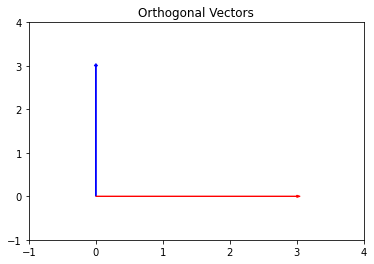

In [106]:
import matplotlib.pyplot as plt

vector1 = [0, 3]
vector2 = [3, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector1[0], vector1[1],head_width = .05, head_length = 0.05, color ='blue')
plt.arrow(0,0, vector2[0], vector2[1],head_width = .05, head_length = 0.05, color ='red')
plt.xlim(-1,4)          
plt.ylim(-1,4)
plt.title("Orthogonal Vectors")
plt.show()

### Check: Dot product = 0 for Orthogonal Vectors
# dot_product = np.dot(vector1, vector2)
# print('Dot Product = ' + str(dot_product))

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [124]:
vector_a = np.array([-5, 3, 7])

vector_b = np.array([6, -8, 2])

dot = np.dot(vector_a, vector_b)
dot

### Explanation:
# Because the dot product is not 0, the vectors are not orthogonal

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [119]:
c = np.array([2, -15, 6, 20])

# Norm^2 of c
norm_c = np.linalg.norm(c)
norm_c_sqrd = norm_c ** 2
norm_c_sqrd

665.0

In [120]:
# Dot Product of c and c
dot = np.dot(c,c)
dot

665

In [123]:
# c Transpose
c_transpose = c.T

# Vector Multiplication
vector_multi = c_transpose * c
vector_multi

array([  4, 225,  36, 400])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

**Linear Combination of Scalars and Unit Vectors (d):**

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}



**Linear Combination of Scalars and Unit Vectors (e):**

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8\end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [129]:
f = np.array([4, 12, 11, 9, 2])

# Find the Norm / Magnitude of f
norm_f = np.linalg.norm(f)
norm_f

# Unit Vector = vector / norm of vector
unit_vector = f / norm_f
unit_vector

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

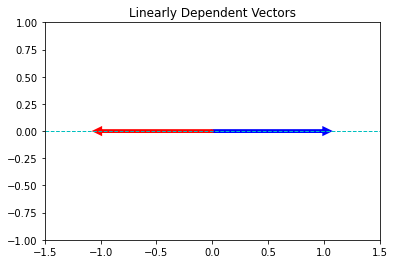

In [148]:
# Graph: Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1.5, 1.5)
plt.ylim(-1, 1)

# Vectors
vector = [1, 0] 
vector2 = np.multiply(-1, vector)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color = 'c', linewidth = 1)
plt.arrow(0, 0, vector[0], vector[1], linewidth = 3, head_width = .05, head_length = 0.05, color ='blue')
plt.arrow(0, 0, vector2[0], vector2[1], linewidth = 3, head_width = .05, head_length = 0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

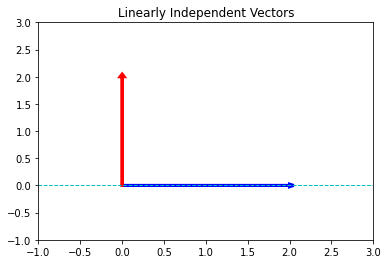

In [147]:
# Graph: Linearly Independent Vectors

# Axis Bounds
plt.xlim(-1, 3)
plt.ylim(-1, 3)

# Original Vectors
vector = [2, 0] 
vector2 = [0, 2]

# Values for Line
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

# Plot Vectors and Line
plt.plot(x_vals, y_vals, '--', color = 'c', linewidth = 1)
plt.arrow(0, 0, vector[0], vector[1], linewidth = 3, head_width = .05, head_length = 0.05, color ='blue')
plt.arrow(0, 0, vector2[0], vector2[1], linewidth = 3, head_width = .05, head_length = 0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

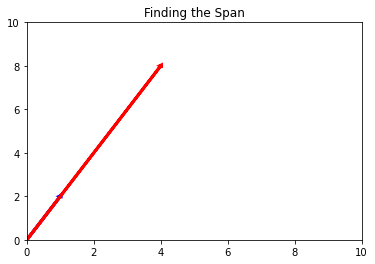

In [151]:
# Graph: Finding the Span

# Axis Bounds
plt.xlim(0, 10)
plt.ylim(0, 10)

# Original Vectors
vector = [1, 2] 
vector2 = [4, 8]

# Values for Line
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

# Plot Vectors and Line
plt.plot(x_vals, y_vals, '--', color = 'c', linewidth = 1)
plt.arrow(0, 0, vector[0], vector[1], linewidth = 3, head_width = .05, head_length = 0.05, color ='blue')
plt.arrow(0, 0, vector2[0], vector2[1], linewidth = 3, head_width = .05, head_length = 0.05, color ='red')

plt.title("Finding the Span")
plt.show()

**Span** of these two vectors **is 1** because they form a straight line. span is the set of all possible vectors that can be create with a linear combination of just two vectors; in this case, just 1. 

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

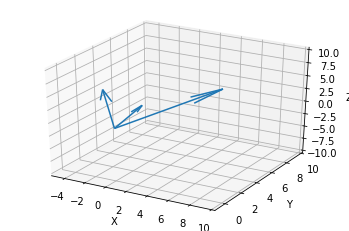

In [167]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Graph of 3D Vectors: Span of Three Vectors

vector1 = [1, 2, 3]
vector2 = [-1, 0, 7]
vector3 = [4, 8, 2]

vectors = np.array([
                    [0, 0, 0, 1, 2, 3],
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2],
                    ])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length = 1)
ax.set_xlim([-5, 10])
ax.set_ylim([-1, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**Span = 3**; because the three vectors expand out into three dimensions.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

**Answer:** Forming a "basis" is when a set of vectors are linearly independent and span the vector space in which they are a subset of.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

**Answer:** The Rank of the above matrix is 3, because it expands into three dimensions. The below  function converts a matrix into reduced row echelon form and shows that matrix P has three pivots along the main diagonals, proving that all the columns are linearly independent.

In [168]:
def row_echelon(A):
    """ Return Row Echelon Form of matrix A """

    # if matrix A has no columns or rows,
    # it is already in REF, so we return itself
    r, c = A.shape
    if r == 0 or c == 0:
        return A

    # we search for non-zero element in the first column
    for i in range(len(A)):
        if A[i,0] != 0:
            break
    else:
        # if all elements in the first column is zero,
        # we perform REF on matrix from second column
        B = row_echelon(A[:,1:])
        # and then add the first zero-column back
        return np.hstack([A[:,:1], B])

    # if non-zero element happens not in the first row,
    # we switch rows
    if i > 0:
        ith_row = A[i].copy()
        A[i] = A[0]
        A[0] = ith_row

    # we divide first row by first element in it
    A[0] = A[0] / A[0,0]
    # we subtract all subsequent rows with first row (it has 1 now as first element)
    # multiplied by the corresponding element in the first column
    A[1:] -= A[0] * A[1:,0:1]

    # we perform REF on matrix from second row, from second column
    B = row_echelon(A[1:,1:])

    # we add first row and first (zero) column, and return
    return np.vstack([A[:1], np.hstack([A[1:,:1], B]) ])

P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]], dtype='float')

row_echelon(P)

array([[1., 2., 3.],
       [0., 1., 5.],
       [0., 0., 1.]])

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space which is spanned by it's columns if the columns are all linearly independent of one other. If columns are linearly dependent, dropping the linearly dependent columns, and adding only the independent columns, always you to find the rank.

# Linear Projections -- **Stretch Goal**

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

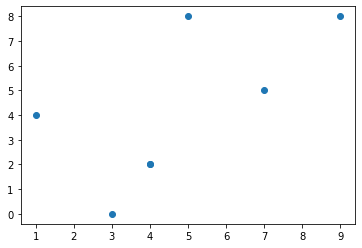

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()